In [2]:
loadlibrary <- function(x)
{
  if (!require(x,character.only = TRUE))
  {
    install.packages(x, repos='http://cran.us.r-project.org', dep=TRUE)
    if(!require(x,character.only = TRUE)) stop("Package not found")
  }
}
    
loadlibrary("plyr")
loadlibrary("class")
loadlibrary("gmodels")

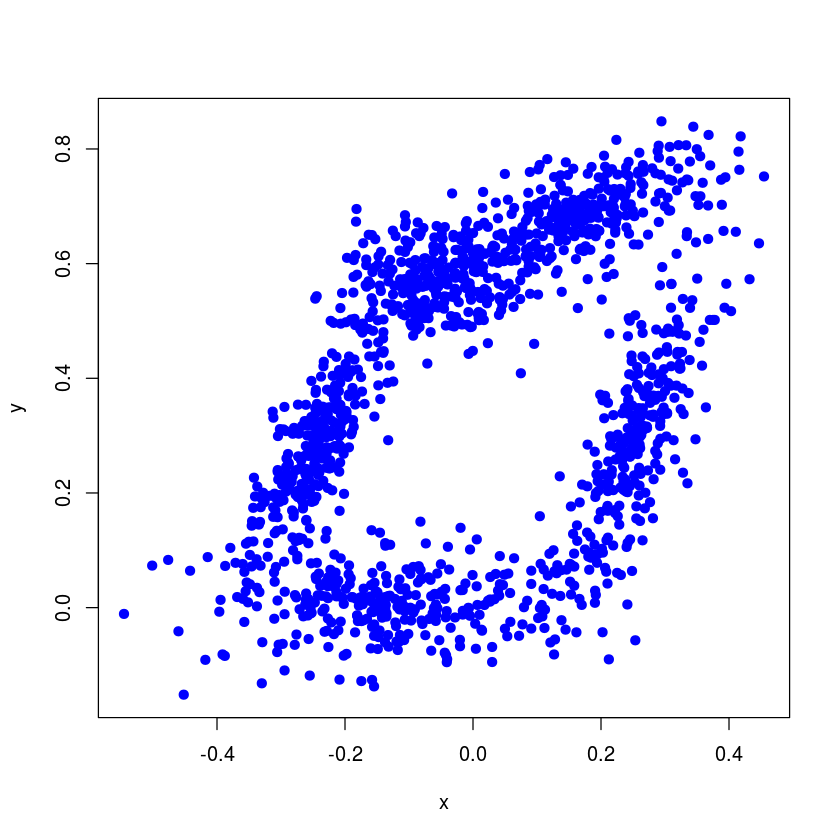

In [3]:
df <- read.csv('knnDataSet.csv', header=TRUE)

plot(df$x, df$y, xlab='x', ylab='y', col=c('blue'), pch=19)

In [4]:
mean(df$x)

[1] 2.666668e-12

In [5]:
mean(df$y)

[1] 0.3671691

In [6]:
var(df$x)

[1] 0.04301172

In [7]:
var(df$y)

[1] 0.06626633

In [8]:
cov(df$x,df$y)

[1] 0.02223514

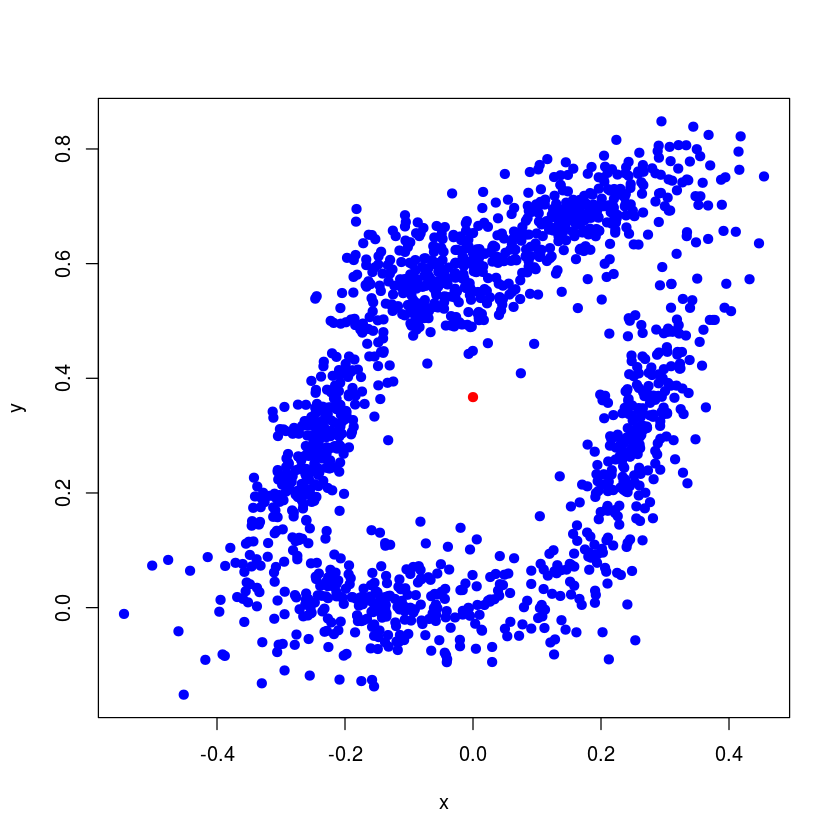

In [9]:
plot(df$x, df$y, xlab="x", ylab="y", col = "blue", pch=19)
points(mean(df$x), mean(df$y), col="red", pch=19)

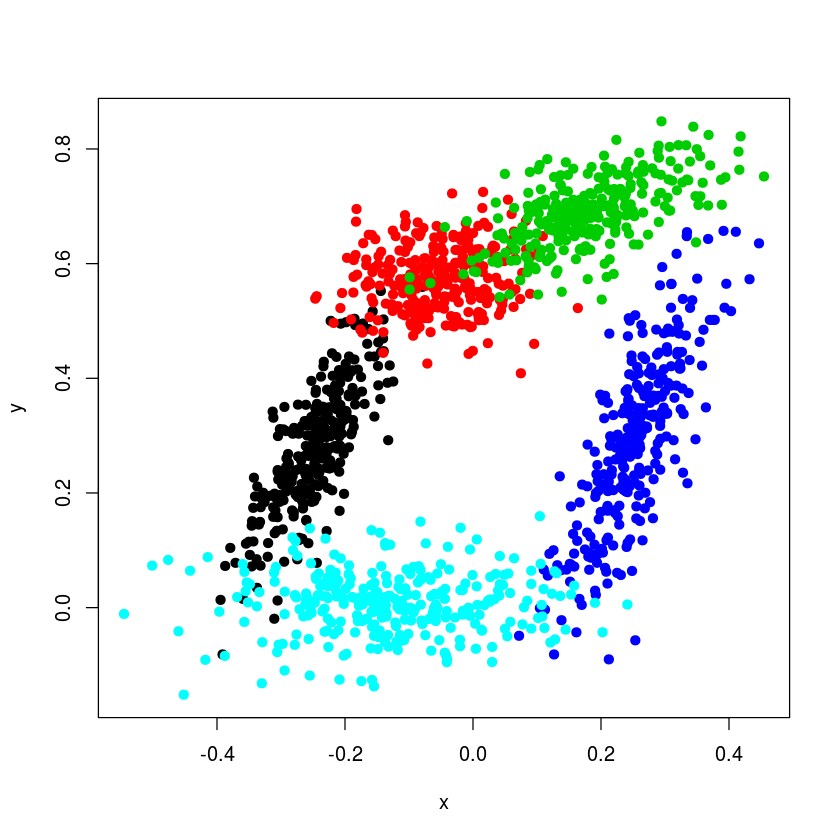

In [10]:
plot(df$x, df$y, xlab="x", ylab="y", col=df$L, pch=19)

In [11]:
df.agg.mean = aggregate(df[,c("x","y")], list("L"=df$L), mean)
df.agg.mean

L,x,y
1,-0.24739830,0.277393485
2,-0.05364637,0.572112887
3,0.17882616,0.687624100
4,0.25160731,0.290401254
5,-0.12938880,0.008313891


In [12]:
aggregate(df[,c("x","y")], list("L"=df$L), var)

L,x,y
1,0.002789279,0.011225235
2,0.005189387,0.003180482
3,0.008650975,0.003514508
4,0.003635940,0.022957101
5,0.018669066,0.002956136


In [13]:
require(plyr)
func <- function(df)
{
return(data.frame(COV = cov(df$x, df$y)))
}

ddply(df, .("L"=df$L), func)

L,COV
1,0.0043921614
2,0.0003916219
3,0.0033758560
4,0.0071608803
5,0.0001947123


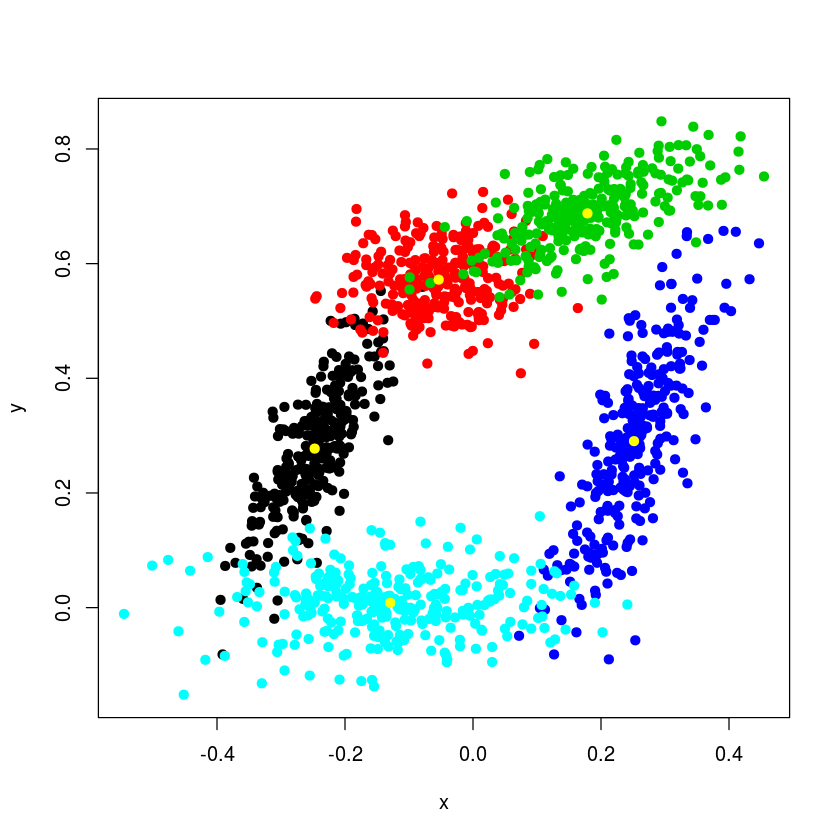

In [14]:
plot(df$x, df$y, xlab="x", ylab="y", col=df$L, pch=19)
points(df.agg.mean$x, df.agg.mean$y, col="yellow", pch=19)

In [33]:
train_size <- floor(0.75 * nrow(df))
train_ind <- sample(seq_len(nrow(df)), size = train_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

test_pred <- knn(train = train[c("x","y")], test = test[c("x","y")], cl = train$L, k=3)
CrossTable(x = test$L, y = test_pred,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  375 

 
             | test_pred 
      test$L |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        64 |         3 |         0 |         0 |         6 |        73 | 
             |     0.877 |     0.041 |     0.000 |     0.000 |     0.082 |     0.195 | 
             |     0.955 |     0.041 |     0.000 |     0.000 |     0.070 |           | 
             |     0.171 |     0.008 |     0.000 |     0.000 |     0.016 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |         1 |        67 |         5 |         0 |         0 |        73 | 
             |     0.014 |     0.918 |     

In [34]:
test_pred <- knn(train = train[c("x","y")], test = test[c("x","y")], cl = train$L, k=1)
CrossTable(x = test$L, y = test_pred,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  375 

 
             | test_pred 
      test$L |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        65 |         2 |         0 |         0 |         6 |        73 | 
             |     0.890 |     0.027 |     0.000 |     0.000 |     0.082 |     0.195 | 
             |     0.970 |     0.029 |     0.000 |     0.000 |     0.069 |           | 
             |     0.173 |     0.005 |     0.000 |     0.000 |     0.016 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |         1 |        63 |         9 |         0 |         0 |        73 | 
             |     0.014 |     0.863 |     

In [35]:
test_pred <- knn(train = train[c("x","y")], test = test[c("x","y")], cl = train$L, k=5)
CrossTable(x = test$L, y = test_pred,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  375 

 
             | test_pred 
      test$L |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        66 |         2 |         0 |         0 |         5 |        73 | 
             |     0.904 |     0.027 |     0.000 |     0.000 |     0.068 |     0.195 | 
             |     0.957 |     0.026 |     0.000 |     0.000 |     0.059 |           | 
             |     0.176 |     0.005 |     0.000 |     0.000 |     0.013 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |         1 |        68 |         4 |         0 |         0 |        73 | 
             |     0.014 |     0.932 |     

In [36]:
test_pred <- knn(train = train[c("x","y")], test = test[c("x","y")], cl = train$L, k=11)
CrossTable(x = test$L, y = test_pred,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  375 

 
             | test_pred 
      test$L |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        66 |         2 |         0 |         0 |         5 |        73 | 
             |     0.904 |     0.027 |     0.000 |     0.000 |     0.068 |     0.195 | 
             |     0.957 |     0.026 |     0.000 |     0.000 |     0.059 |           | 
             |     0.176 |     0.005 |     0.000 |     0.000 |     0.013 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |         1 |        68 |         4 |         0 |         0 |        73 | 
             |     0.014 |     0.932 |     

In [37]:
test_pred <- knn(train = train[c("x","y")], test = test[c("x","y")], cl = train$L, k=25)
CrossTable(x = test$L, y = test_pred,prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  375 

 
             | test_pred 
      test$L |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        66 |         2 |         0 |         0 |         5 |        73 | 
             |     0.904 |     0.027 |     0.000 |     0.000 |     0.068 |     0.195 | 
             |     0.943 |     0.027 |     0.000 |     0.000 |     0.059 |           | 
             |     0.176 |     0.005 |     0.000 |     0.000 |     0.013 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |         1 |        66 |         6 |         0 |         0 |        73 | 
             |     0.014 |     0.904 |     